BOTTOM UP APPROACH w/ tabulation

Maximum value: 220
Selected items (weight, value): [(20, 100), (30, 120)]


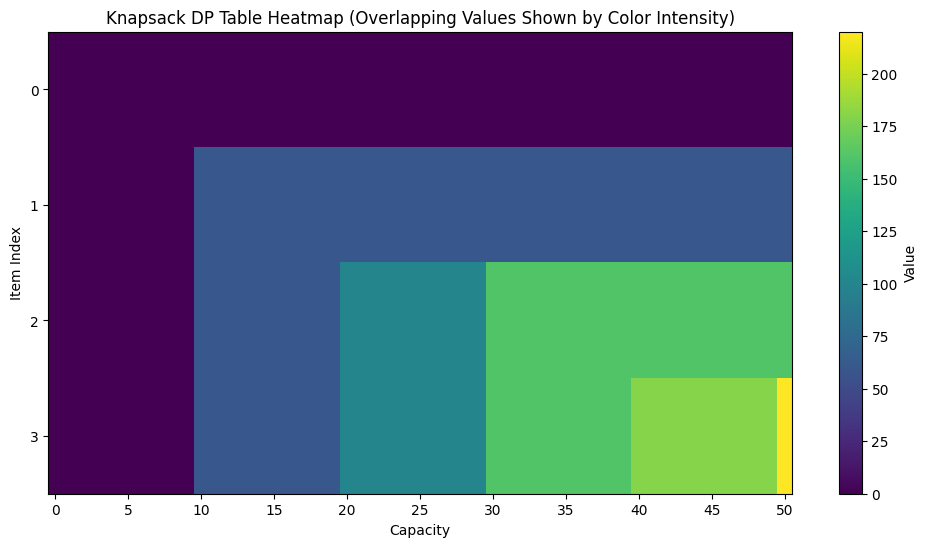

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def knapsack(weights, values, capacity):
    n = len(weights)
    dp = [[0] * (capacity + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        for w in range(capacity + 1):
            if weights[i - 1] <= w:
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - weights[i - 1]] + values[i - 1])
            else:
                dp[i][w] = dp[i - 1][w]
    return dp

def backtrack_items(dp, weights, values, capacity):
    i = len(weights)
    w = capacity
    selected_items = []

    while i > 0 and w > 0:
        if dp[i][w] != dp[i - 1][w]:
            selected_items.append((weights[i - 1], values[i - 1]))  # (weight, value)
            w -= weights[i - 1]
        i -= 1

    return selected_items[::-1]  # reverse to maintain input order

if __name__ == "__main__":
    weights = [10,20,30]
    values = [60,100,120]
    capacity = 50


    dp_result = knapsack(weights, values, capacity)
    max_value = dp_result[len(weights)][capacity]
    selected_items = backtrack_items(dp_result, weights, values, capacity)
    dp_array = np.array(dp_result)
    print("Maximum value:", max_value)
    print("Selected items (weight, value):", selected_items)
    # Plotting the DP table as a heatmap
    plt.figure(figsize=(12, 6))
    plt.imshow(dp_array, cmap='viridis', interpolation='nearest', aspect='auto')
    plt.colorbar(label='Value')
    plt.xlabel('Capacity')
    plt.ylabel('Item Index')
    plt.title('Knapsack DP Table Heatmap (Overlapping Values Shown by Color Intensity)')
    plt.xticks(np.arange(0, capacity + 1, 5))
    plt.yticks(np.arange(0, len(weights) + 1))
    plt.grid(False)
    plt.show()

TOP DOWN KNAPSACK PROBLEM w/ memoization

In [ ]:


def knapsack_recursive(i, w, weights, values, memo):
    if i == len(weights) or w == 0:
        return 0
    if (i, w) not in memo:

        if weights[i] > w:
            memo[(i, w)] = knapsack_recursive(i + 1, w, weights, values, memo)
        else:
            memo[(i, w)] = max(
                knapsack_recursive(i + 1, w, weights, values, memo),
                values[i] + knapsack_recursive(i + 1, w - weights[i], weights, values, memo)
            )
    return memo[(i, w)]

def knapsack_aux(weights, values, capacity):
    memo = {}
    max_value = knapsack_recursive(0, capacity, weights, values, memo)
    return memo, max_value

def backtrack_aux(memo, weights, values, capacity):
    selected_items = []
    i, w = 0, capacity
    n = len(weights)

    while i < n and w > 0:
        if (i, w) not in memo:
            break
        # Check if taking the item improves the value over skipping
        if weights[i] <= w and memo.get((i, w)) == values[i] + memo.get((i + 1, w - weights[i]), 0):
            selected_items.append((weights[i], values[i]))
            w -= weights[i]
            i += 1
        else:
            i += 1
    return selected_items

if __name__ == "__main__":
    weights = [10, 20, 30]
    values = [60, 100, 120]
    capacity = 50

    memo, max_value = knapsack_aux(weights, values, capacity)
    selected_items = backtrack_aux(memo, weights, values, capacity)

    print("Maximum value:", max_value)
    print("Selected items (weight, value):", selected_items)
